<a href="https://colab.research.google.com/github/chee999/mnist-project/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load in the mnist data set. Keras contains the mnist data set
#!pip install tensorflow keras
#!pip install mnist

In [ ]:
from google.colab import drive, auth
auth.authenticate_user()
from google.colab import drive
from keras.models import Sequential #ANN Architecture
from keras.layers import Dense      #layers in ANN
from keras.utils import to_categorical

import mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the data
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images() # training data images
test_labels = mnist.test_labels() # training data labels

In [ ]:
# Normalize the images. Normalize the pixel values from [0-255] to [-0.5, 0.5] to make our
# network easier to train.
 
train_images = (train_images/255) - 0.5 # returns values 0 to 1
test_images = (test_images/255) - 0.5

#Flatten each 28x28 image into a 1x784 dimension array.
train_images = train_images.reshape((-1,784))  # should get 60000 rows, each having 784 columns
test_images = test_images.reshape((-1, 784))   # should get 10000 rows, each having 784 columns

In [ ]:
# Build a model with 3 layers, 2 layers with 64 neurons and the relu function and 1 layer
# with 10 neurons and softmax function
model = Sequential()
model.add( Dense(64, activation='relu', input_dim=784) )
model.add( Dense(64, activation='relu') )
model.add( Dense(10, activation='softmax') )


In [ ]:
# Compile the model. The loss function measures how well model does on training data then tries to 
# improve it using the optimizer named 'adam'. An optimizer is one of the two arguments required for 
# compiling a Keras model. categorical_crossentropy allows us to use classes that are greater than 2
model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy', metrics = ['accuracy']
)

# to_categorical(train_labels) expects [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] or 10 dim. vector.
# epochs is the number of iterations over the entire data set to train on.
# batch_size is the number of samples per gradient update for training.
#
model.fit(
    train_images,
    to_categorical(train_labels),
    epochs = 5,
    batch_size=32
)

In [ ]:
# Evaluate models
model.evaluate(
    train_images,
    to_categorical(train_labels)
)


In [ ]:
model.evaluate(
    test_images,
    to_categorical(test_labels)
)

In [ ]:
# Make prediction on the first 5 test images
predictions_test = model.predict(test_images[:5])
print(np.argmax(predictions_test, axis=1))

for i in range(0,5):
  first_image = test_images[i]
  first_image = np.array(first_image, dtype='float')
  pixels = first_image.reshape((28,28))
  plt.imshow(pixels, cmap='Accent')
  plt.show()

[5 0 4 1 9]


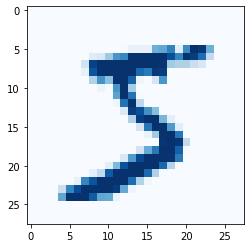

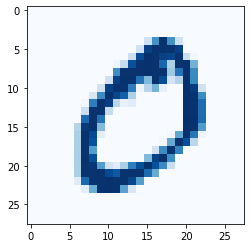

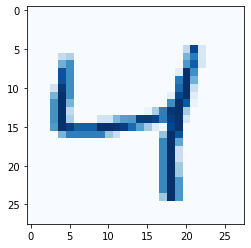

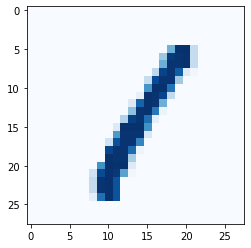

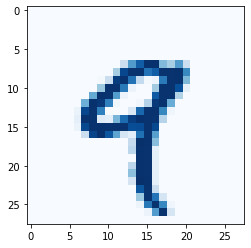

In [ ]:
# Make a prediction on the first 5 train_images
predictions_train = model.predict(train_images[:5])
print(np.argmax(predictions_train, axis=1))

for i in range(0,5):
  first_image = train_images[i]
  first_image = np.array(first_image, dtype='float')
  pixels = first_image.reshape((28,28))
  plt.imshow(pixels, cmap='Blues')
  plt.show()
  